In [1]:
from clifford import make, draw, run
from clifford import B, clipped_gauge, entropy
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
n_qubits = 20
T = 10
p = 0.06
shots = 5

In [3]:
cliffords = []
print("Generating and simulating circuits:")
for _ in tqdm(range(shots)):
    circ = make(n_qubits, T, p, save_intermediate = False)
    # draw(circ)
    result = run(circ, shots = 1)
    cliffords.append(result.data()['t'+str(2*T-1)][0].stab.astype(int)) # Append the final state stabilizer matrix

Generating and simulating circuits:


100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


In [4]:
print("Calculating entropies:")
S = [entropy(cliff, n_qubits // 2, n_qubits) for cliff in tqdm(cliffords)]
np.savetxt("S_{}_{}_{}_{}.out".format(n_qubits, T, p, shots), S)

Calculating entropies:


100%|██████████| 5/5 [00:00<00:00, 37.31it/s]


(array([1., 0., 0., 0., 0., 3., 0., 0., 0., 1.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

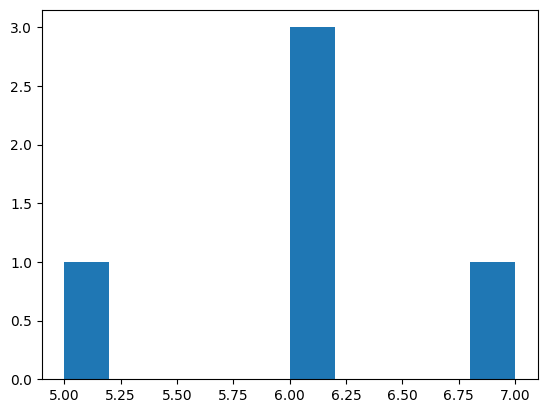

In [5]:
plt.hist(S)